In [ ]:
!mkdir ~/.kaggle

with open("/root/.kaggle/kaggle.json", "w+") as f:
    f.write('{"username":"","key":""}')
    # Put your kaggle username & key here

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Libraries that will be used in this recitation
import numpy as np
import torch
import pandas as pd

# Introduction to Datasets

In this recitation, you will learn about different datasets that will be used in our class for part 2s of the 4 homeworks.

## Numpy Dataset

> Create a Numpy array and save it as .npy file.
>
> (In Google Colab, default working directory is /content/, and the following code will save the array to /content/tmp_array.npy

In [ ]:
tmp_array = np.ones((3,3))
np.save("tmp_array.npy", tmp_array)

> Loading Numpy array from .npy file

In [ ]:
x = np.load("tmp_array.npy")
x # To print the loaded array

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## Pandas Dataset

<b>Note: </b> Pandas library is not usually used for datasets in our homeworks. However, you will need pandas for writing your inference results into CSV files, which will be used for Kaggle submission.

> Generating a dummy submission table (pandas DataFrame object)

In [ ]:
output = pd.DataFrame()
# Set the column names as 'id' and 'label'
output['id'] = np.array(range(10))
output['label'] = np.array(range(10,20))
output

,id,label
0,0,10
1,1,11
2,2,12
3,3,13
4,4,14
5,5,15
6,6,16
7,7,17
8,8,18
9,9,19


> Save the table to CSV file

In [ ]:
output.to_csv("submission.csv", index = False)

> Load CSV file

In [ ]:
output_read = pd.read_csv("submission.csv")
output.head() # Printing the loaded table, .head() method extracts the first N(usually five) rows of the table.

,id,label
0,0,10
1,1,11
2,2,12
3,3,13
4,4,14


## Pytorch Dataset (Class)

```torch.utils.data.Dataset``` is a PyTorch interface for reading, organizing, preprocessing your input data of different formats. You will need to implement your own PyTorch Dataset classes to adapt the dataset we provided, usually numpy files. In this tutorial, we will teach you how to create your custom Dataset class.



> Data loading pipeline for **PyTorch**

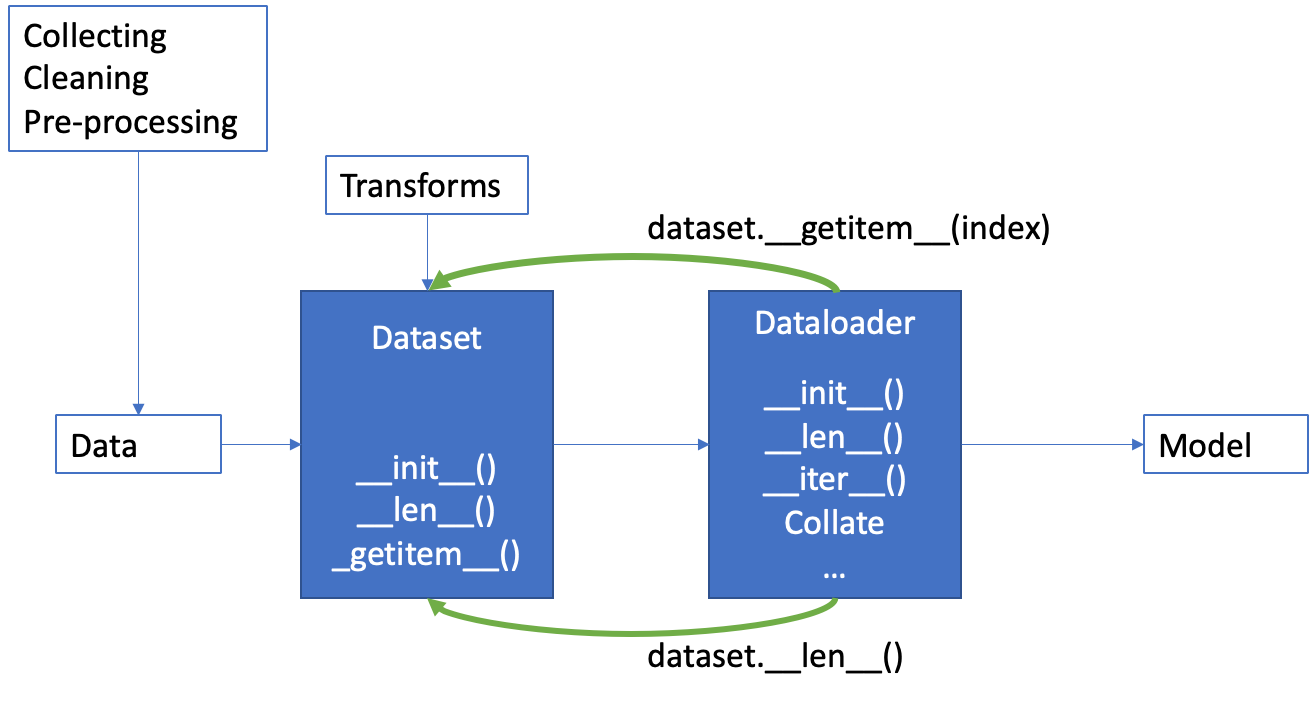

> Basic Custom Dataset Class Structure (functions are documented in the comments)

In [ ]:
from torch.utils.data import Dataset
# Dataset class will have access to the data or contain the data
# And will be used by the dataloader class to access parts of it
# Dataloader will use it to create batches, process data etc.

# torch.utils.data.Dataset is an abstract class representing a dataset. Your custom dataset should inherit Dataset and override the following methods:
# __len__ so that len(dataset) returns the size of the dataset.
# __getitem__ to support the indexing such that dataset[i] can be used to get ith sample.
class MyDataset(Dataset):
    # Constructor
    # In this case, the class is initialized with Numpy Data called xs, and ys.
    # However, in some cases you could also pass in filenames, and other parameters such that this constructor will load the file and store in the memory
    # Sometimes you can also apply data cleaning or data pre-processing in your constructor
    def __init__(self, xs, ys):
        self.xs = xs
        self.ys = ys

    # __len__ method returns how many samples(data) your Dataset contains
    def __len__(self):
        return len(self.xs)  #len(self.ys)

    # __getitem__ returns the item at index i
    # It will be called everytime your model requests a data. So it is optimal to reduce the computation time of this function
    # The preprocessing should not be done here, usually it's done in the constructor function.
    def __getitem__(self, i):
        return self.xs[i], self.ys[i]

> Constructing a MyDataset instance

In [ ]:
# Here we are generating our dummy samples and labels
xs = list(range(10))
ys = list(range(10,20))

In [ ]:
# Create an instance of MyDataset Class
dataset = MyDataset(xs, ys)

In [ ]:
# Reading data from dataset object
# The indexing operation will call __getitem__ function.
# In this case, the 0th items in xs and ys are returned as a tuple.
dataset[0]

(0, 10)

In [ ]:
# You can also pass the dataset to a loop
for x, y in dataset:
  print("X: ", x)
  print("Y: ", y)
  break

X:  0
Y:  10


### Exercise

Fill in the blanks to define a Dataset that takes in a list of numpy sample and label files.

In [ ]:
class MyDataset(Dataset):
    # Constructor
    # x_files_paths will take in a list of numpy files, each file contains one sample
    # y_files_paths will take in a list of numpy files, each file contains one label
    def __init__(self, x_files_paths=[], y_files_paths=[]):
        self.x_files = x_files_paths
        self.y_files = y_files_paths

        # Assume that there will be same number of x and y files, and the filename would be either "x_{file_id}.npy" or "y_{file_id}.npy"
        # The file_id is a unique identifier for each training sample.
        # How can you make sure that the x and y loaded are in the same order?
        # HINT: SORT!

        self.x_files = _______
        self.y_files = _______

        # Fill in the below two lines(might require more) to load the numpy data and store it into class variables
        self.x = _________
        self.y = _________

        # Do some preprocessing to the data you loaded, be creative.
        _______

    # __len__ method returns how many samples(data) your Dataset contains
    def __len__(self):
        return ___________  # Fill

    # __getitem__ returns the item at index i
    def __getitem__(self, i):
        return ___________ # Fill

# Audio Datasets (Homework 1)

## Downloading the Dataset

In [ ]:
!kaggle competitions download -c 11785-hw1p2-f23

100% 8.11G/8.13G [01:35<00:00, 98.7MB/s]
100% 8.13G/8.13G [01:35<00:00, 91.3MB/s]


In [ ]:
!mkdir '/content/data'
!unzip -qo '11785-hw1p2-f23.zip' -d '/content/data'

In homework 1, we will provide you with MFCC speech data formatted in numpy arrays. MFCC is derived from raw waveform data. The process of calculating MFCC is not required in this course, but we will cover that in Recitation 1.

The datasets for HW1P2 is organized below.

```
some-competition-datasets
  ├── dev-clean: For evaluation of your model, transcripts(lables) are provided
  ├── test-clean: You have to predict the samples in this folder, and submit the result of your prediction to Kaggle
  └── train-clean-100: For training
```




## Training Samples & Labels

Load one sample and corresponding label from ```dev-clean```.

In [ ]:
SAMPLE_INDEX = "1272-128104-0000"
x_file_path = f"/content/data/11-785-f23-hw1p2/dev-clean/mfcc/{SAMPLE_INDEX}.npy"
y_file_path = f"/content/data/11-785-f23-hw1p2/dev-clean/transcript/{SAMPLE_INDEX}.npy"

x = np.load(x_file_path)
y = np.load(y_file_path)

Now we have loaded one speech data and its transcript. Every speech MFCC data is organized as an array of shape ```T x 28```, where ```T``` is the total number of timesteps, and 28 is the number of features for MFCC file format.

In [ ]:
print("Shape of x: ", x.shape)

Shape of x:  (581, 28)


As for the transcript, it is organized as a 1-D array with length ```T + 2``` The two extra timesteps are \<SOS\> and \<EOS\> tokens, which stand for "start of sequence" and "end of sequence", located in the beggining and the end respectively.

**NOTE:** For homework 1, the two tokens are not needed. So you might want to remove them in part of your preprocessing pipeline.

In [ ]:
print("Shape of y: ", y.shape)
print("Some elements of y: ", y[77:87])

Shape of y:  (583,)
Some elements of y:  ['ER' 'ER' 'ER' 'K' 'K' 'K' 'K' 'K' 'K' 'K']


## Context Information

Proper management of local context is essential to homework 1, in which we are predicting the phoenome for each of the time step. The dominant solution in the past was setting a "hand-crafted" context with the following approaches: derivatives or context windows. In this homework, we are going to apply context windows.

Context windows adds a local context by simply concatenating multiple consecutive timesteps. The result is a bigger feature vector that is better "aware" of the local information.

For example, originally, the input to the network and the expected output to the network for timestep 64 would be:

In [ ]:
x[64], y[65] # y is offset by one as we would like to ignore the SOS token

(array([-1.50605318e+01,  2.97819813e+01,  2.61281988e+01,  2.49296280e+01,
         7.82449516e-01,  6.36235563e+00,  7.30908389e+00,  1.42838448e+01,
         6.55455359e+00,  3.28262372e+00,  4.11496166e+00, -3.18396988e+00,
         1.57395257e+01, -5.39837227e+00, -8.06764105e+00, -1.07442854e+01,
         3.37831324e+00, -1.10332817e+00, -9.00352902e+00, -1.87173712e+00,
         1.36365019e+00,  9.21219830e-01, -4.25623833e-01,  1.32671040e-01,
        -6.81853188e-03, -2.33281301e-01, -2.94195093e-02,  1.42503709e+02]),
 'S')

Now we want to apply context window of 10 to the 64-th timestep, this could be done by concatenating features from 10 past and 10 future frames.:

In [ ]:
x_with_context = x[64 - 10: 64 + 11] # Use slicing to get

In [ ]:
print("After concatinating context, the shape of x:", x_with_context.shape)

After concatinating context, the shape of x: (21, 28)


Since we are designing an MLP network, we might want to flatten x to a 1-D array as its a single training sample.

In [ ]:
x_with_context = x_with_context.reshape(-1)

# Image Dataset (Homework 2)

HW2P2 has two tasks, classification and verification. Each one of them has it's own associated dataset.

In [ ]:
!mkdir '/content/data'


!kaggle competitions download -c 11-785-f23-hw2p2-classification
!unzip -qo '11-785-f23-hw2p2-classification.zip' -d '/content/data'
!kaggle competitions download -c 11-785-f23-hw2p2-verification
!unzip -qo '11-785-f23-hw2p2-verification.zip' -d '/content/data'

mkdir: cannot create directory ‘/content/data’: File exists
100% 1.71G/1.71G [00:25<00:00, 98.9MB/s]
100% 1.71G/1.71G [00:25<00:00, 73.1MB/s]
 83% 14.0M/16.8M [00:01<00:00, 10.8MB/s]
100% 16.8M/16.8M [00:01<00:00, 14.7MB/s]


The datasets have the following file structure

```
data
  - some-competition-hw2p2-classification
      ├── dev: For evaluation of your model, lables are provided
      ├── test: You have to predict the labels for the samples in this folder, and submit the result of your prediction to Kaggle
      └── train: For training
  - some-competition-hw2p2-verification
      └── known: contains all known identities
      ├── unknown_dev: contains unknown identities, lables are provided
      ├── unknown_test: has unknown identites to test model performance
```

## Classification

Each sub-folder in train and dev, under the classification folder, has images of the same person. That means each sub-folder represents a person, and the name of the sub-folder is the identity. But to use this dataset to train a model, we need to map the identities to IDs (non-negative integers) ranging from 0 to one less than the total number of sub-folders (or persons). Fortunately, in this homework you make use of ImageFolder class, which takes care of this by default. Let's load the dataset and have a look.

In [ ]:
import torchvision
import os

DATA_DIR = '/content/data/11-785-f23-hw2p2-classification/' # Path where you have downloaded the data
TRAIN_DIR = os.path.join(DATA_DIR, "train")

train_dataset = torchvision.datasets.ImageFolder(TRAIN_DIR)
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 128,
#                                            shuffle = True, pin_memory = True)

Print one sample from the dataset

In [ ]:
train_dataset[-1]

(<PIL.Image.Image image mode=RGB size=224x224>, 7000)

You can see that a sample contains an image and the corresponding label (ID).

Let's see what is inside the image.

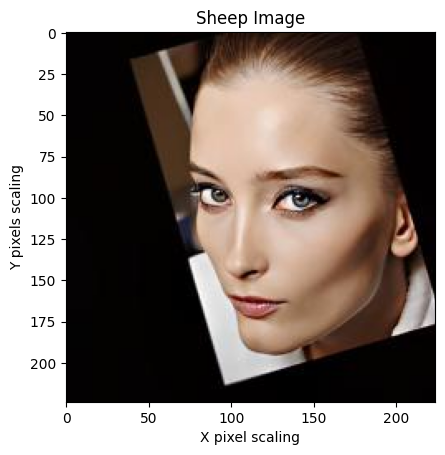

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

plt.title("Sheep Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")

plt.imshow(train_dataset[-1][0])
plt.show()

There is one more thing. The images are in the PIL format by default, so you need to transform it into a tensor before passing it as input to our model.

So typically, your dataset class will atleast look as below:

In [ ]:
train_transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.ImageFolder(TRAIN_DIR, transform = train_transforms)

Inside the test directory are images for which you will need to predict their labels/classes (IDs) each, and submit it in a csv file. A sample is provided to you.

In [ ]:
output = pd.read_csv(DATA_DIR+"sample_submission.csv")
output.head()

,id,label
0,000000.jpg,1789
1,000001.jpg,1789
2,000002.jpg,1789
3,000003.jpg,1789
4,000004.jpg,1789


## Verification

The known folder, under verification, has sub-folders each of which contain an image identified by the name of the sub-folder. In the unknown_dev and the unknown_test sub-folders there are images that have not been identified. The dataset here is pretty straighforward, you load the images from the folders and stack them.

Note: for the known images you keep track of the identifiers as well. They will be used as labels for unknown images that have a high similarity with the particular image associated with that identity.

In [ ]:
import glob
from tqdm import tqdm
from PIL import Image

# This obtains the list of known identities from the known folder
known_regex = "/content/data/11-785-f23-hw2p2-verification/known/*/*"
known_paths = [i.split('/')[-2] for i in sorted(glob.glob(known_regex))]

# Obtain a list of images from unknown folders
unknown_dev_regex = "/content/data/11-785-f23-hw2p2-verification/unknown_dev/*"
unknown_test_regex = "/content/data/11-785-f23-hw2p2-verification/unknown_test/*"

# We load the images from known and unknown folders
unknown_dev_images = [Image.open(p) for p in tqdm(sorted(glob.glob(unknown_dev_regex)))]
unknown_test_images = [Image.open(p) for p in tqdm(sorted(glob.glob(unknown_test_regex)))]
known_images = [Image.open(p) for p in tqdm(sorted(glob.glob(known_regex)))]

# Why do you need only ToTensor() here?
transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()])

unknown_dev_images = torch.stack([transforms(x) for x in unknown_dev_images])
unknown_test_images = torch.stack([transforms(x) for x in unknown_test_images])
known_images  = torch.stack([transforms(y) for y in known_images ])
#Print your shapes here to understand what we have done

# You can use other similarity metrics like Euclidean Distance if you wish
similarity_metric = torch.nn.CosineSimilarity(dim= 1, eps= 1e-6)

100%|██████████| 960/960 [00:00<00:00, 10528.89it/s]


Print the shapes to see what the stacking does.

In [ ]:
known_images.shape

torch.Size([960, 3, 224, 224])